In [11]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pandas
from sklearn.cluster import KMeans
import numpy as numpy


data = datasets.load_breast_cancer()
df = pandas.DataFrame(data.data, columns=data.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


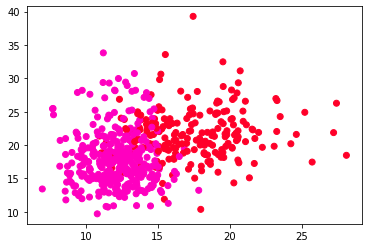

In [12]:
# Grab first 3 columns of the data as subset
X = data.data[:, :] 

# Set k-means target
y = data.target

plt.scatter(X[:,0], X[:,1], c=y, cmap='gist_rainbow')

In [13]:
km = KMeans(n_clusters = 2, n_jobs = 4, random_state=21)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=4, precompute_distances='auto',
       random_state=21, tol=0.0001, verbose=0)

In [14]:
centers = km.cluster_centers_

Text(0.5, 1.0, 'Predicted')

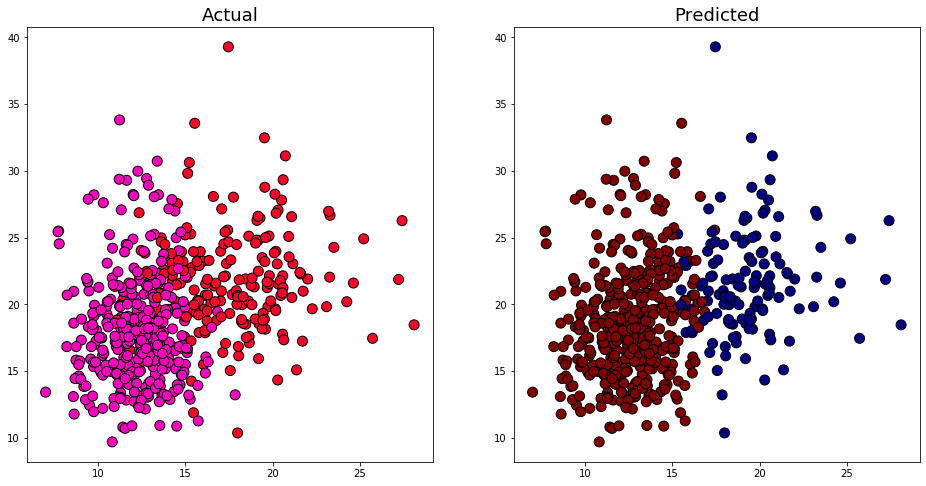

In [15]:
# These are the labels for the data points according to the
# k-means centerpoints that were found when fitting
new_labels = km.labels_

# Create the figure and axes (size and amount of figures)
fig, axes = plt.subplots(1, 2, figsize=(16,8))

# Plot all data points of X again, but this time color them based
# on the predicted labels rather than their actual labels
# S = Size of points (diameter)
# C = Category labels
axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='gist_rainbow',
edgecolor='k', s=100)

axes[1].scatter(X[:, 0], X[:, 1], c=new_labels, cmap='jet',
edgecolor='k', s=100)

# Length and width correspond to grid lines for y and x respectively 
# Direction corresponds to whether the lines point towards or away from graph
# Optional: Some tick params
#axes[0].tick_params(direction='in', length=10, width=15, colors='k', labelsize=20)
#axes[1].tick_params(direction='in', length=10, width=15, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

In [31]:
from sklearn.model_selection import train_test_split
from sklearn import svm, tree
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# Split the dataset up in a train and test 
# X_train = data that the classifier will be trained on
# Y_test = Target labels ("answers") for the X_train training set
# X_test = data that the classifier will be tested with 
# Y_test = Target labels ("answers") for the X_test testing set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, shuffle=True)



In [32]:
# Create an array of classifies that we can loop through
# in order to assess which one is most suitable for the
# issue at hand according to https://medium.com/datadriveninvestor/choosing-the-best-algorithm-for-your-classification-model-7c632c78f38f

classifiers = []

model2 = svm.SVC()
classifiers.append(model2)

model3 = tree.DecisionTreeClassifier()
classifiers.append(model3)

model4 = RandomForestClassifier()
classifiers.append(model4)

In [33]:
for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy of %s is %s"%(clf, acc))
    cm = confusion_matrix(y_test, y_pred)
    #print("Confusion Matrix of %s is %s"%(clf, cm))

Accuracy of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is 0.8951048951048951
Accuracy of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') is 0.9300699300699301
Accuracy of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_imp

In [19]:

# The first two columns of the
# dataset (called predictors)
X = dataset.data[:, :3]

# Assign the target to the label column
y = dataset.target

# Visualise a scatter plot using X0 and X1
plt.scatter(X[:,1], X[:,2], c=y, cmap='gist_rainbow')
plt.xlabel('0', fontsize=18)
plt.ylabel('1', fontsize=18)

NameError: name 'dataset' is not defined